In [1]:
from sympy import *
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def input_data():
    try:
        q1 = input("Введите выражение для q1: ")
        q2 = input("Введите выражение для q2: ")
        C = input("Введите выражение для C: ") 
        P = input("Введите выражение для P: ")
        return (q1, q2, C, P)
    except ValueError:
        print("Ошибка ввода!")
        return None
    except KeyboardInterrupt:
        print("Прервано пользователем")
        return None
                
def check_data(varibles):
    for i in varibles:
        try:
            sympify(i)
        except SympifyError:
            print("Неверный ввод")
            return False
    return True

In [16]:
my_functions = input_data()

if my_functions != None: 
    result_of_check = check_data(my_functions)
    if result_of_check != False:
        print("Все выражения введены верно, можете приступать к вычислениям!")
    else:
        print("Упс... Что-то пошло не так, видимо, ошибка в введенных вами выражениях, попробуйте ввести их еще раз!")
else:
    print("Вы ошиблись, попробуйте ввести функции еще раз!")

Введите выражение для q1: 65 -1 * p1
Введите выражение для q2: 68 -2 * p2
Введите выражение для C: 4 * (q1 ** 2) + 5 * q1 * q2 + 1 * (q2 ** 2) + 4
Введите выражение для P: p1 * q1 + p2 * q2 - C
Все выражения введены верно, можете приступать к вычислениям!


# Вариант 13
#### q1 = 65 -1 * p1
#### q2 = 68 -2 * p2
#### C = 4 * (q1 ** 2) + 5 * q1 * q2 + 1 * (q2 ** 2) + 4
#### P = p1 * q1 + p2 * q2 - C

In [34]:
q1, q2, C, P = my_functions

print(q1)
print()
print(q2)
print()
print(C)
print()
print(P)

65 -1 * p1

68 -2 * p2

4 * (q1 ** 2) + 5 * q1 * q2 + 1 * (q2 ** 2) + 4

p1 * q1 + p2 * q2 - C


#### Преобразуем строковые выражения в общие математические выражения

In [39]:
q1_E = sympify(q1)
q2_E = sympify(q2)
C_E = sympify(C)
C_E = C_E.subs([("q1", q1), ("q2", q2)])
P_E = sympify(P)
P_E = P_E.subs([("q1", q1), ("q2", q2), ("C", C_E)])
print(q1_E)
print()
print(q2_E)
print()
print(C_E)
print()
print(P_E)

65 - p1

68 - 2*p2

4*(65 - p1)**2 + 5*(65 - p1)*(68 - 2*p2) + (68 - 2*p2)**2 + 4

p1*(65 - p1) + p2*(68 - 2*p2) - 4*(65 - p1)**2 - 5*(65 - p1)*(68 - 2*p2) - (68 - 2*p2)**2 - 4


In [56]:
result = optimize.minimize(lambda x: -lambdify(["p1", "p2"], P_E)(x[0], x[1]), x0=(0, 0), method="BFGS")

In [57]:
result

      fun: -209.49999999999918
 hess_inv: array([[ 0.59998902, -0.50001378],
       [-0.50001378,  0.49998618]])
      jac: array([3.81469727e-06, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([59.99999988, 32.50000047])

In [58]:
p1_max, p2_max, extremum = result.x[0], result.x[1], -result.fun

In [59]:
print(extremum)
print(p1_max, p2_max)

209.49999999999918
59.999999878709055 32.50000047264851


In [67]:
def draw_chart():
    plot1 = plotting.plot3d(P_E, ("p1", -p1_max * 5, p1_max * 5), ('p2', -p2_max * 5, p2_max * 5), show=False)
    plot1.xlabel = "Цена единицы товара x1"
    plot1.ylabel = "Цена единицы товара x2"
    plot1.title = "Прибыль фирмы-монополиста, тыс. руб."
    plot1.show()

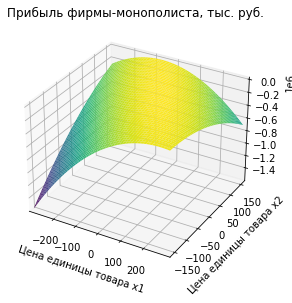

In [68]:
draw_chart()

In [62]:
def draw_contour():
    x, y = np.mgrid[-5 * p1_max:p1_max * 5, -5 * p2_max:p2_max * 5]
    z = lambdify(["p1", "p2"], P_E)(x, y)

    fig, ax = plt.subplots()
    ax.contour(x, y, z, levels=20)
    fig.set_figwidth(6)
    fig.set_figheight(6)
    plt.title("Прибыль фирмы монополиста, тыс. руб.")
    plt.xlabel("Цена единицы товара x1")
    plt.ylabel("Цена единицы товара x2")
    plt.plot(p1_max, p2_max, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="green")
    plt.text(p1_max + 10,p2_max + 20,f'M*{int(p1_max), int(p2_max)}',horizontalalignment='right')
    plt.show()

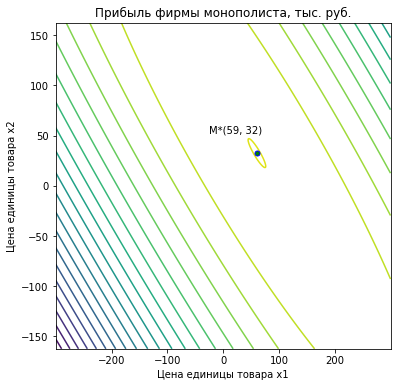

In [63]:
draw_contour()

In [64]:
print("ОТВЕТ: ")
print(f"Оптимальный план (q1*;q2*) = {int(p1_max), int(p2_max)}, Максимальная прибыль П(q1*;q2*) = {extremum} ")

ОТВЕТ: 
Оптимальный план (q1*;q2*) = (59, 32), Максимальная прибыль П(q1*;q2*) = 209.49999999999918 
